In [1]:
import numpy as np
from tensorflow.keras import datasets, utils

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

NUM_CLS = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = utils.to_categorical(y_train, NUM_CLS)
y_test = utils.to_categorical(y_test, NUM_CLS)


In [3]:
from tensorflow.keras import layers, models

In [5]:
input_layer = layers.Input(shape=(64,64,1))
conv_layer_1 = layers.Conv2D(
    filters=2,
    kernel_size=(3,3),
    strides=1,
    padding='same')(input_layer)

2023-12-26 18:31:21.475534: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-12-26 18:31:21.475567: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-26 18:31:21.475583: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-26 18:31:21.475912: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-26 18:31:21.476312: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
input_layer = layers.Input(shape=(32,32,3))
conv_layer_1 = layers.Conv2D(
    filters=10,
    kernel_size=(4,4),
    strides=2,
    padding='same'
)(input_layer)
conv_layer_2 = layers.Conv2D(
    filters=20,
    kernel_size=(3,3),
    strides=2,
    padding='same'
)(conv_layer_1)
flatten_layer = layers.Flatten()(conv_layer_2)
output_layer = layers.Dense(units=10, activation='softmax')(flatten_layer)
model = models.Model(input_layer, output_layer)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 10)        490       
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 15120 (59.06 KB)
Trainable params: 15120 (59.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
input_layer = layers.Input(shape=(32,32,3))
x = layers.Conv2D(filters=32, kernel_size=3,
                  strides=1, padding='same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=32, kernel_size=3,
                  strides=2, padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(
    filters=64,
    kernel_size=3,
    strides=1,
    padding='same'
)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(
    filters=64,
    kernel_size=3,
    strides=2,
    padding='same'
)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x - layers.Dropout(rate=0.5)(x)

output_layer = layers.Dense(10, activation='softmax')(x)

model = models.Model(input_layer, output_layer)

In [11]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_6 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                          

In [14]:
from tensorflow.keras import optimizers

opt = optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.3603 - accuracy: 0.8746
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.3137 - accuracy: 0.8917
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.2806 - accuracy: 0.9023
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.2549 - accuracy: 0.9121
Epoch 5/10
1563/1563 [==============================] - 342s 219ms/step - loss: 0.2308 - accuracy: 0.9189
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.2121 - accuracy: 0.9255
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.1948 - accuracy: 0.9313
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.1776 - accuracy: 0.9378
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.1657 - accuracy: 0.9422
Epoch 10/10
1563/1563 [==============================] - 31s 2

In [15]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 40ms/step - loss: 1.1855 - accuracy: 0.7138


[1.1854970455169678, 0.7138000130653381]

In [17]:
classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [18]:
preds_single = classes[np.argmax(preds, axis=-1)]
actual_single = classes[np.argmax(y_test, axis=-1)]

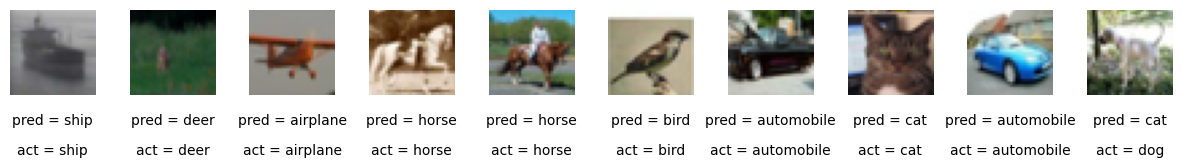

In [20]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)